In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D,\
                                    Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from keras.utils import plot_model
import math

In [2]:
datagen = ImageDataGenerator(validation_split=.1, rescale=1./255)

In [3]:
train_generator = datagen.flow_from_directory('../mfcc_specs/',
                                              target_size=(216,144),
                                              batch_size=64,
                                              color_mode='grayscale',
                                              shuffle=True,
                                              interpolation='lanczos',
                                              subset='training')

validation_generator = datagen.flow_from_directory('../mfcc_specs/',
                                                  target_size=(216,144),
                                                  color_mode='grayscale',
                                                  shuffle=True,
                                                  interpolation='lanczos',
                                                  subset='validation')

Found 7198 images belonging to 8 classes.
Found 796 images belonging to 8 classes.


In [6]:
test = train_generator.next()

In [14]:
test[0].shape

(64, 216, 144, 1)

In [17]:
train_generator.class_indices

{'Electronic': 0,
 'Experimental': 1,
 'Folk': 2,
 'Hip-Hop': 3,
 'Instrumental': 4,
 'International': 5,
 'Pop': 6,
 'Rock': 7}

In [18]:
validation_generator.filenames

['Electronic/Electronic_100497.png',
 'Electronic/Electronic_100522.png',
 'Electronic/Electronic_100535.png',
 'Electronic/Electronic_100536.png',
 'Electronic/Electronic_100544.png',
 'Electronic/Electronic_100549.png',
 'Electronic/Electronic_100550.png',
 'Electronic/Electronic_100552.png',
 'Electronic/Electronic_100745.png',
 'Electronic/Electronic_100835.png',
 'Electronic/Electronic_100972.png',
 'Electronic/Electronic_100973.png',
 'Electronic/Electronic_100975.png',
 'Electronic/Electronic_100976.png',
 'Electronic/Electronic_103600.png',
 'Electronic/Electronic_104276.png',
 'Electronic/Electronic_104277.png',
 'Electronic/Electronic_104278.png',
 'Electronic/Electronic_104279.png',
 'Electronic/Electronic_104282.png',
 'Electronic/Electronic_104283.png',
 'Electronic/Electronic_104284.png',
 'Electronic/Electronic_105408.png',
 'Electronic/Electronic_105411.png',
 'Electronic/Electronic_105412.png',
 'Electronic/Electronic_105413.png',
 'Electronic/Electronic_105414.png',
 

In [19]:
validation_generator.color_mode

'grayscale'

In [35]:
validation_generator.next()[0].shape

(32, 216, 144, 1)

In [24]:
validation_generator.index_array

array([399, 184, 183, 201, 688, 144, 723, 492, 728, 194, 331, 324, 342,
       477,  23, 137, 789, 665, 697, 590, 292,  72, 160,  53, 158, 260,
       403, 335, 277, 350, 736, 556,  75, 189, 542, 607, 553, 745, 758,
       203, 712, 741, 569, 440, 394, 598, 489, 595, 714, 104, 795, 730,
       453, 418,  29,  74, 318, 589, 469, 699, 216,  60, 370, 224, 504,
       517, 612, 694, 524, 126, 311, 238, 709, 680, 751, 186, 639, 108,
       765, 583, 548, 511, 785, 747, 586, 313, 625, 487, 185, 354,  73,
       585, 248,  11, 283, 233, 768,   1, 281, 536, 267, 727, 310,  52,
       587, 717, 163, 165,  38,  14, 474,   4, 280, 516, 434, 367, 558,
         8, 518, 286, 778, 638, 190, 559, 205, 273, 124, 578, 420, 632,
       161, 604, 742, 419, 544, 288, 686,  42, 328, 502,  48,  67, 726,
       314, 315, 213, 616, 414, 520, 442, 573, 110, 622, 707, 390, 734,
       380, 705, 200, 540, 227, 396, 178, 307, 109, 480, 563, 457, 646,
       750, 631, 594, 740, 689, 481, 678, 379, 691, 656, 155,  2

In [34]:
model = Sequential()

model.add(Input(shape=(216,114,1), name = 'img_input'))

model.add(Conv2D(32,
                 activation='relu',
                 kernel_size=(3,3),
                 name='conv_1'))
model.add(MaxPooling2D(name='pool_1'))


model.add(Conv2D(64,
                 activation='relu',
                 kernel_size=(3,3),
                 name='conv_2'))
model.add(MaxPooling2D(name='pool_2'))


# model.add(Conv2D(128,
#                  activation='relu',
#                  kernel_size=(3,3)))
# model.add(MaxPooling2D())


model.add(Flatten(name='flat_1'))




# model.add(Dense(32,
#                 activation='relu',
#                 input_shape=(X_train[0].shape),
#                 kernel_regularizer=l2(.00001)))
# model.summary()

# model.add(Dropout(.1))

model.add(Dense(64,
                activation='relu',
                kernel_regularizer=l2(),
                name='interpretation'))
# model.summary()

# model.add(Flatten())
# model.summary()

model.add(Dense(8,
                activation='softmax',
                name='output'))

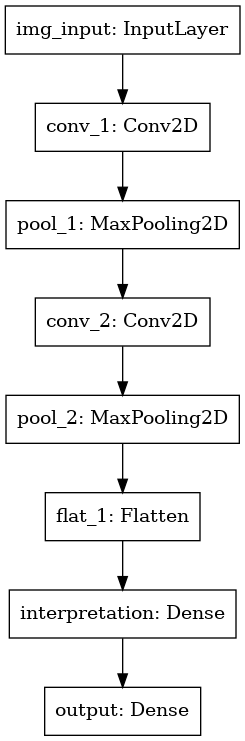

In [35]:
plot_model(model, to_file='../images/conv2d_sequential.png')

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [36]:
results = model.fit(train_generator,
                    steps_per_epoch = 112,
                    epochs=10,
                    validation_data = validation_generator,
                    validation_steps=12,
                    verbose = 1)

Epoch 1/10
112/112 [==============================] - 60s 535ms/step - loss: 2.7801 - accuracy: 0.1286 - val_loss: 2.0806 - val_accuracy: 0.2005
Epoch 2/10
112/112 [==============================] - 60s 533ms/step - loss: 2.0397 - accuracy: 0.2224 - val_loss: 1.8543 - val_accuracy: 0.3255
Epoch 3/10
112/112 [==============================] - 60s 538ms/step - loss: 1.8962 - accuracy: 0.2780 - val_loss: 1.8029 - val_accuracy: 0.3216
Epoch 4/10
112/112 [==============================] - 60s 531ms/step - loss: 1.8416 - accuracy: 0.3109 - val_loss: 1.7916 - val_accuracy: 0.3229
Epoch 5/10
112/112 [==============================] - 60s 533ms/step - loss: 1.8474 - accuracy: 0.3070 - val_loss: 1.7517 - val_accuracy: 0.3672
Epoch 6/10
112/112 [==============================] - 59s 528ms/step - loss: 1.8223 - accuracy: 0.3161 - val_loss: 1.8158 - val_accuracy: 0.3190
Epoch 7/10
112/112 [==============================] - 59s 530ms/step - loss: 1.8119 - accuracy: 0.3256 - val_loss: 1.7779 - val_ac

35,37

In [9]:
preds = model.predict(validation_generator)

In [20]:
model.evaluate(validation_generator)

13/13 [==============================] - 4s 271ms/step - loss: 2.4253 - accuracy: 0.3065


[2.4252705574035645, 0.3065326511859894]

In [19]:
preds[:10]

array([[0.10477554, 0.1392022 , 0.0746507 , 0.08296563, 0.04473116,
        0.15502377, 0.2205271 , 0.17812397],
       [0.05231972, 0.13438451, 0.07149927, 0.18172036, 0.0467974 ,
        0.39336294, 0.06827576, 0.05164004],
       [0.0068673 , 0.1269801 , 0.3407054 , 0.0078323 , 0.12462358,
        0.32300916, 0.05219458, 0.01778756],
       [0.12937067, 0.119345  , 0.03139967, 0.01992351, 0.12556367,
        0.02637611, 0.13807325, 0.40994805],
       [0.23834538, 0.11263402, 0.02178209, 0.18499991, 0.0709701 ,
        0.26214266, 0.0951543 , 0.01397156],
       [0.13972238, 0.24874128, 0.0807453 , 0.04985839, 0.09569968,
        0.08382621, 0.2157813 , 0.08562543],
       [0.03563951, 0.1484186 , 0.16054627, 0.03870412, 0.09031805,
        0.34909457, 0.11080602, 0.06647284],
       [0.08462797, 0.10257515, 0.10348429, 0.08109422, 0.05686495,
        0.2775028 , 0.14516778, 0.14868288],
       [0.21274917, 0.10242035, 0.03332598, 0.21621822, 0.03174904,
        0.15365183, 0.178081

In [25]:
math.ceil(train_generator.samples//64)

112

In [24]:
train_generator.samples//64

112

In [26]:
math.ceil(validation_generator.samples//64)

12